# NTM - propagation tree analysis

### Enrico Gavagnin



## To Do

- exclude from distribution of coefficient all ants that have *at least* one NaN in either nests


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 9]
import rpy2.robjects as robjects
import pickle


## Propagation Tree Fit

In [133]:
import scipy.optimize as opt
with open('data/propagation_trees_data.pkl', 'rb') as f:
    prop_tree = pickle.load(f)

    

prop_coef_df = pd.DataFrame(columns=['rep', 'exp', 'nest', 'mean', 'std'])
prop_coef = {}
def monoExp(x, m, t, t0):
    return m * np.exp(t * (x - t0))

for myrm_file in prop_tree.keys():
    print(myrm_file)
    prop_coef[myrm_file] = {}

    for focal_ant in prop_tree[myrm_file].keys():

        prop_coef[myrm_file][focal_ant] = [np.nan] * 4

        for tw in range(4):


            # percentage influence for exp fit
            perc_exp_fit = 20 #%
            x_cut = int(len(prop_tree[myrm_file][focal_ant][tw]) * perc_exp_fit / 100)

            x = np.array(prop_tree[myrm_file][focal_ant][tw][1:x_cut])

            y = np.array(range(len(x))) + 2

            if len(x) == x_cut - 1 & len(x) > 2:
                x = x - x[0]
                # perform the fit
                p0 = (1.39, 0.0041, 325) # start with values near those we expect
                bounds = ()
                params, cv = opt.curve_fit(monoExp, x, y, p0, maxfev=100000)
                m, t, t0 = params
                # Rsquared error
                r2 = np.sum([(y[i] - monoExp(x[i], m, t, t0))**2 for i in range(len(x))])
                if r2 < x_cut * 3:
                    prop_coef[myrm_file][focal_ant][tw] = t
        #             plt.plot(x/(6*60), y, '.')
        #             plt.plot(x[:-1]/(6*60), monoExp(x, m, t, t0)[:-1], '--', label="fitted")
        #             plt.title('ant:'+ str(focal_ant) + ', exp_rate: {:f} \n square_error: {:f}'.format(t, r2))
        #             plt.xlabel('time (min)')
        #             plt.ylabel('size propagation tree (ants)')

        prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
    myrm_dict = {}        
    myrm_dict['rep'] = int(myrm_file[1:3])
    myrm_dict['exp'] = myrm_file[4:7]
    myrm_dict['nest'] = myrm_file[7]
    myrm_dict['mean'] = np.nanmean(list(prop_coef[myrm_file].values()))
    myrm_dict['std'] = np.nanstd(list(prop_coef[myrm_file].values()))
   
    prop_coef_df = pd.concat([prop_coef_df, pd.DataFrame(myrm_dict, index=[0])], ignore_index=True)
print(prop_coef_df)



s13_DEHa


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))


s13_DEHb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s14_MODa


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s14_MODb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))


s15_DENa


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s15_DENb


/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s16_DIAa


/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))


s16_DIAb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s17_MODa


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could 

s17_MODb
s18_DENa


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not b

s18_DENb


/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s19_DIAa


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))


s19_DIAb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s20_DEHa


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could 

s20_DEHb
s21_DIAa


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s21_DIAb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))


s22_MODa


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s22_MODb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))


s23_DENa


/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s23_DENb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))


s24_DEHa


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s24_DEHb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s25_DEHa


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s25_DEHb


/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s26_DENa


/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s26_DENb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s27_MODa


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s27_MODb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s28_DIAa


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s28_DIAb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s29_DENa


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s29_DENb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s30_MODa


/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))


s30_MODb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))


s31_DEHa


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))


s31_DEHb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s32_DIAa


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s32_DIAb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))


s33_MODa


/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))


s33_MODb


/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


s34_DEHa


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s34_DEHb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s35_DIAa


/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s35_DIAb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s36_DENa


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s36_DENb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s37_DIAa


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s37_DIAb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s38_DEHa


/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s38_DEHb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s39_DENa


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s39_DENb


/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s40_MODa


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s40_MODb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s42_DIAa


/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s42_DIAb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s43_DENa


/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s43_DENb


/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s44_MODa


/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s44_MODb


/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))


s45_DENa


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s45_DENb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s46_DIAa


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s46_DIAb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s47_DEHa


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s47_DEHb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s48_MODa


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))


s48_MODb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s49_MODa


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s49_MODb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s50_DIAa


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))


s50_DIAb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packa

s51_DEHa


/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s51_DEHb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s52_DENa


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s52_DENb


/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s53_DIAa


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s53_DIAb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could 

s54_MODa
s54_MODb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s55_DEHa


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s55_DEHb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s56_DENa


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s56_DENb


/Users/eg558/opt/anaconda3/envs/NTM_analysis/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/var/folders/ck/9rwyl45n1ybckdc_zm28rlgr0000gn/T/ipykernel_10436/482152296.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


   rep  exp nest      mean       std
0   13  DEH    a  0.003824  0.000827
1   13  DEH    b  0.004387   0.00082
2   14  MOD    a  0.003576  0.001015
3   14  MOD    b  0.003808  0.000896
4   15  DEN    a  0.003497  0.000947
..  ..  ...  ...       ...       ...
81  54  MOD    b  0.003361  0.000891
82  55  DEH    a  0.004039  0.001037
83  55  DEH    b  0.004756  0.000809
84  56  DEN    a   0.00278  0.000608
85  56  DEN    b  0.003569  0.000711

[86 rows x 5 columns]


<AxesSubplot:ylabel='Count'>

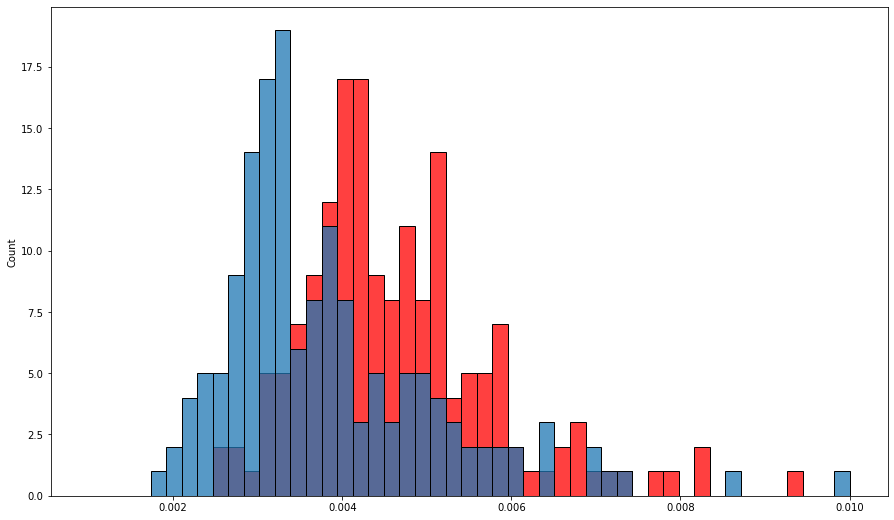

In [97]:
bins = np.linspace(0.001,0.01,50)

myr = 's49_MOD'
sns.histplot(prop_coef[myr + 'a'], bins = bins, color = 'r')
sns.histplot(prop_coef[myr + 'b'], bins = bins)

In [94]:
[np.isnan(list(prop_coef[myrm].values())).sum() for myrm in prop_coef.keys()]

In [123]:
prop_coef_df

,rep,exp,nest,mean,std
0,13,DEH,b,0.004387,0.00082
